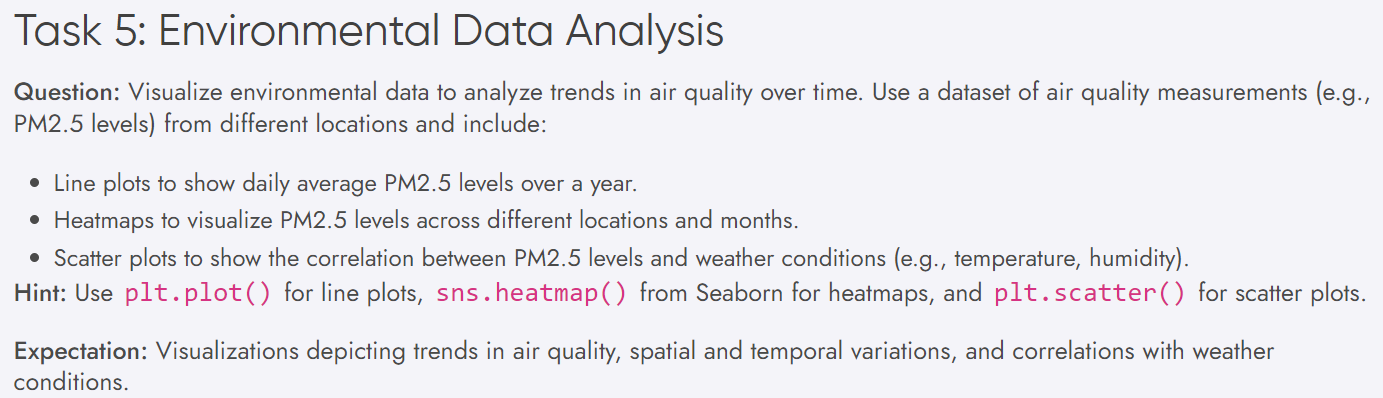

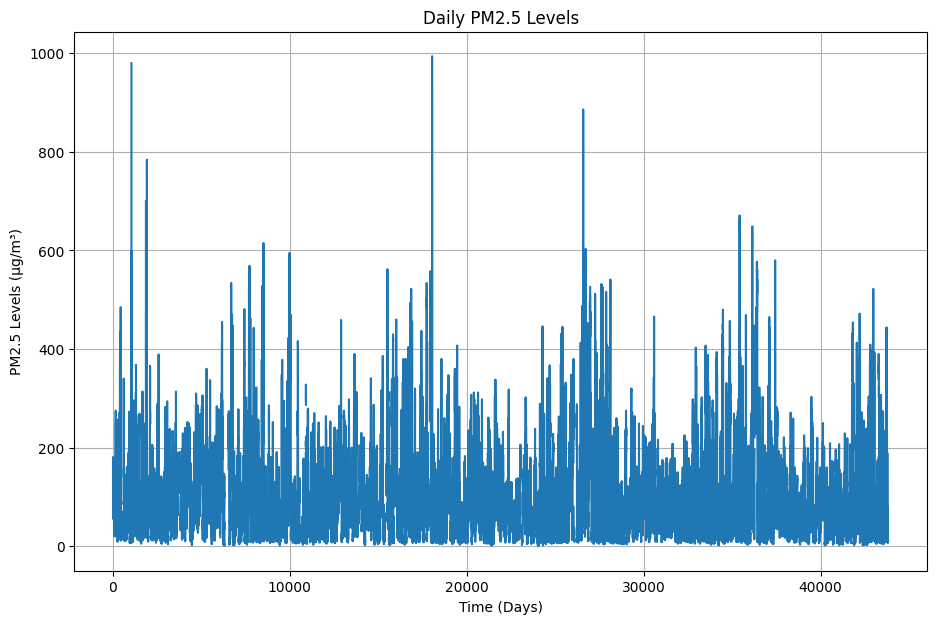

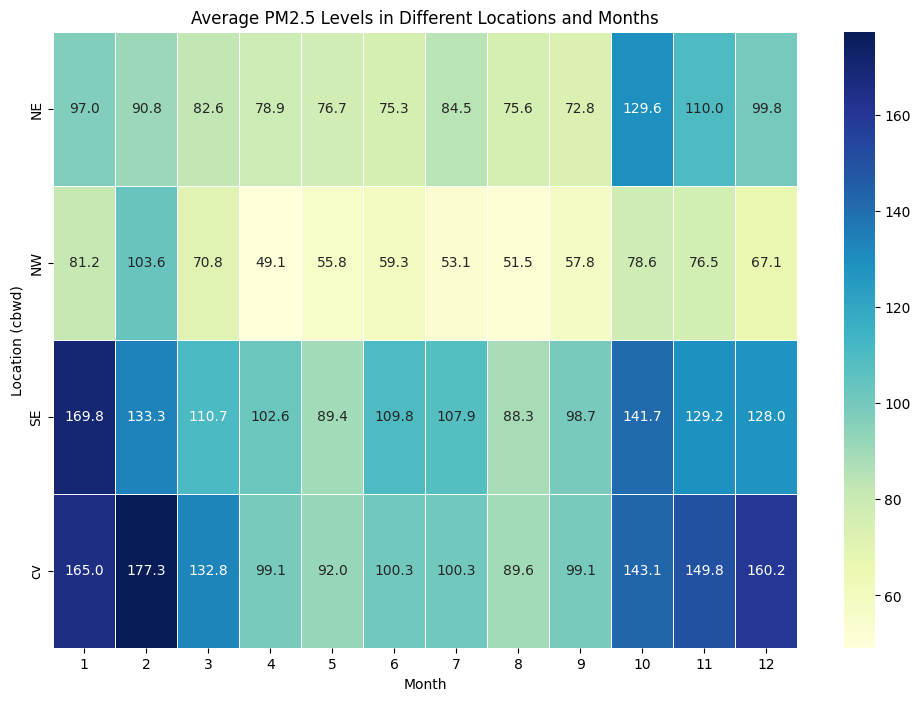

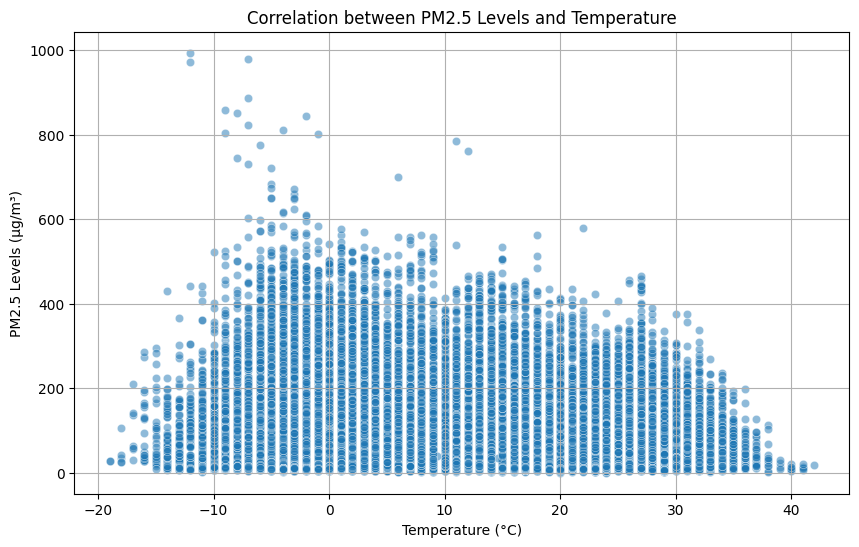

In [3]:
# Import required libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/PRSA_data_2010.1.1-2014.12.31.csv")

# Clean the data
data = data.drop_duplicates()

# Line plots to show daily average PM2.5 levels over a year.
# Assuming the data is ordered by date, you can plot the pm2.5 levels directly
plt.figure(figsize=(11,7))
plt.plot(data["pm2.5"])
plt.title("Daily PM2.5 Levels")
plt.xlabel("Time (Days)")
plt.ylabel("PM2.5 Levels (µg/m³)")
plt.grid(True)
plt.show()

# Heatmaps to visualize PM2.5 levels across different locations and months.
# Aggregate the data to get the mean PM2.5 levels for each location and month
data_clean = data.dropna(subset=['pm2.5', 'cbwd', 'month', 'year'])
pivot_table = data_clean.groupby(['cbwd', 'month'])['pm2.5'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.4)
plt.title('Average PM2.5 Levels in Different Locations and Months')
plt.xlabel('Month')
plt.ylabel('Location (cbwd)')
plt.show()

# Scatter plots to show the correlation between PM2.5 levels and weather conditions (ex: Temp).
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='pm2.5', data=data, alpha=0.5)
plt.title('Correlation between PM2.5 Levels and Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.grid(True)
plt.show()